# Paris Agreement: Entry Into Force

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn
from pandas_datapackage_reader import read_datapackage

Reading in the [data package](https://github.com/openclimatedata/paris-agreement-entry-into-force) with ratification status of the Paris Agreement.

In [3]:
parties = read_datapackage("https://github.com/openclimatedata/paris-agreement-entry-into-force")

In [4]:
parties.head()

,Name,Signature,Ratification-Acceptance-Approval,Kind,Date-Of-Effect,Emissions,Percentage,Year
Code,,,,,,,,
AFG,Afghanistan,2016-04-22,NaT,NaN,NaT,19328.0,0.05,2005
ALB,Albania,2016-04-22,2016-09-21,Ratification,2016-11-04,6717.0,0.02,2000
DZA,Algeria,2016-04-22,2016-10-20,Ratification,2016-11-19,111023.0,0.30,2000
AND,Andorra,2016-04-22,NaT,NaN,NaT,522.0,0.00,2011
AGO,Angola,2016-04-22,NaT,NaN,NaT,61611.0,0.17,2005


In [5]:
parties.count()

Name                                197
Signature                           193
Ratification-Acceptance-Approval    114
Kind                                114
Date-Of-Effect                      114
Emissions                           191
Percentage                          191
Year                                191
dtype: int64

The European Union is contained as a block and as single parties so let's look at EU parties only.

In [6]:
eu28 = [
  'BEL',
  'BGR',
  'DNK',
  'DEU',
  'EST',
  'FIN',
  'FRA',
  'GRC',
  'IRL',
  'ITA',
  'HRV',
  'LVA',
  'LTU',
  'LUX',
  'MLT',
  'NLD',
  'AUT',
  'POL',
  'PRT',
  'ROU',
  'SWE',
  'SVK',
  'SVN',
  'ESP',
  'CZE',
  'HUN',
  'GBR',
  'CYP'
]
assert(len(eu28) == 28)

In [7]:
parties.loc[eu28]

,Name,Signature,Ratification-Acceptance-Approval,Kind,Date-Of-Effect,Emissions,Percentage,Year
Code,,,,,,,,
BEL,Belgium,2016-04-22,NaT,NaN,NaT,119424.0,0.32,2013
BGR,Bulgaria,2016-04-22,NaT,NaN,NaT,55893.0,0.15,2013
DNK,Denmark,2016-04-22,2016-11-01,Approval,2016-12-01,56001.0,0.15,2013
DEU,Germany,2016-04-22,2016-10-05,Ratification,2016-11-04,950673.0,2.56,2013
EST,Estonia,2016-04-22,2016-11-04,Ratification,2016-12-04,21741.0,0.06,2013
FIN,Finland,2016-04-22,2016-11-14,Ratification,2016-12-14,62989.0,0.17,2013
FRA,France,2016-04-22,2016-10-05,Ratification,2016-11-04,496761.0,1.34,2013
GRC,Greece,2016-04-22,2016-10-14,Ratification,2016-11-13,105111.0,0.28,2013
IRL,Ireland,2016-04-22,2016-11-04,Ratification,2016-12-04,58755.0,0.16,2013


For the emissions shares the last available data submitted to the UNFCCC was used.

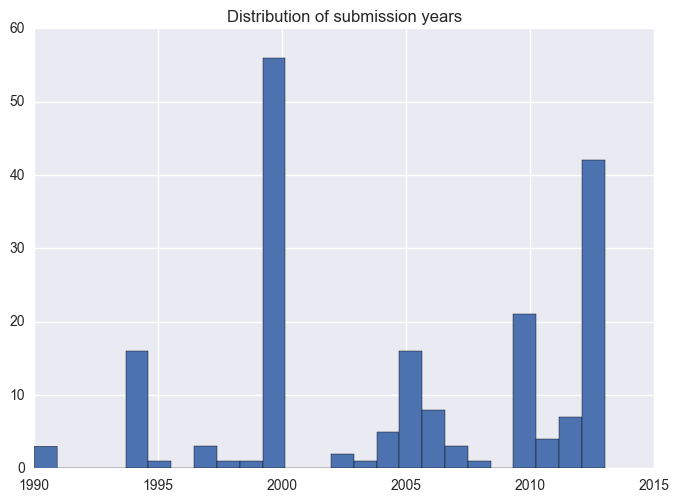

In [8]:
parties.Year.hist(bins=25 )
plt.title("Distribution of submission years")

And a look at how emissions are distributed, many countries with small shares.

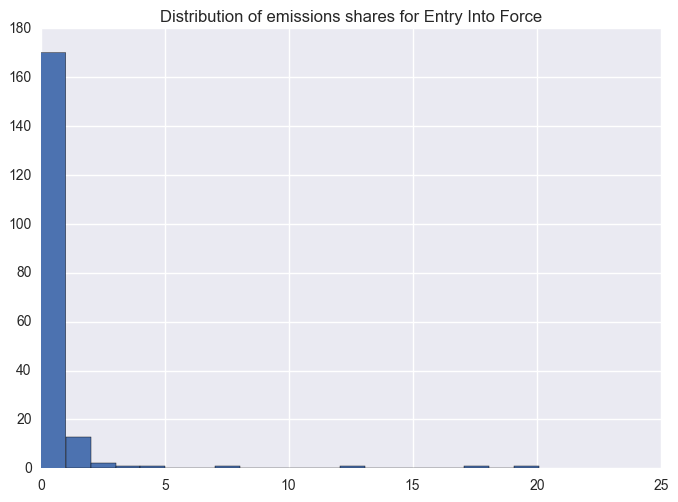

In [9]:
parties.Percentage.hist(bins=20)
plt.title("Distribution of emissions shares for Entry Into Force")

In [10]:
not_ratified = parties[parties["Ratification-Acceptance-Approval"].isnull() != False]
ratified = parties[parties["Ratification-Acceptance-Approval"].isnull() == False]

Sum of emissions of parties that have ratified, subtracting EU emissions to avoid double-counting.

In [11]:
print(ratified.Percentage.sum() - parties.loc["EU28"].Percentage)

78.96


A list of the ten highest emitters who have not yet ratified.

In [12]:
not_ratified.sort_values("Emissions", ascending=False).head(10)

,Name,Signature,Ratification-Acceptance-Approval,Kind,Date-Of-Effect,Emissions,Percentage,Year
Code,,,,,,,,
RUS,Russian Federation,2016-04-22,NaT,NaN,NaT,2799434.0,7.53,2013
IRN,Iran (Islamic Republic of),2016-04-22,NaT,NaN,NaT,483669.0,1.30,2000
TUR,Turkey,2016-04-22,NaT,NaN,NaT,459102.0,1.24,2013
ESP,Spain,2016-04-22,NaT,NaN,NaT,322003.0,0.87,2013
KAZ,Kazakhstan,2016-08-02,NaT,NaN,NaT,313442.0,0.84,2013
ECU,Ecuador,2016-07-26,NaT,NaN,NaT,247990.0,0.67,2006
NGA,Nigeria,2016-09-22,NaT,NaN,NaT,212444.0,0.57,2000
UZB,Uzbekistan,NaT,NaT,NaN,NaT,199837.0,0.54,2005
NLD,Netherlands,2016-04-22,NaT,NaN,NaT,195807.0,0.53,2013
